<a href="https://www.kaggle.com/code/ayushs9020/ridge-regression-from-scratch?scriptVersionId=128493268" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1 | Ridge Regression 
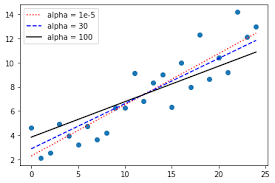

First of all lets understand what the hell is this `Regression`???

**What** - `Regression` is just like the lost brother of `classification`. In `classification` we have `discrete` or `particular values`, that we want to `classify`, In `regression` we have `continuous values`, that we want to `predict`

| Classification |Regression |
| --- | --- |
|  We have discrete values| We have continuous values |
|Usually we know these values in depth | We usually don't know these values in depth|
|These are comparatively less in number| These are comparatively more in number |

# 2 | What other things we will learn here
* Slope of Function
* Baisc Diffrentiation
* Intercept 

**Why** - Regression is a very useful method and is used in many places to predict values.

**How** - There are many different techniques to perform this operation. 

**I highly encourage you to find different methods by yourself too, and can even try to build your own models, maybe your brain pushes the boundaries of machine learning**

So now we have a basic idea of what regression is, our next move should be knowing about Ridge Regression 

So what is this `RidgeRegresso`


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import IFrame
import seaborn as sns

Lets assume we have data like this

In [2]:
features = np.array([x for x in range(0 , 200 , 1)])

In [3]:
features

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
target = np.array([x for x in range(0 , 400 , 2)])

In [5]:
target

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

Lets assume there is a connection between the `target` , and `features`. By human instacne we know that every element in `target` is just a double of the corresponding element in `features`, or $target  = 2XFeatures$. 

Lets assume we change the target a little bit...

In [6]:
target = np.array([x + 1 for x in range(0 , 400 , 2)])

In [7]:
target

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285,
       287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311,
       313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337,
       339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 36

Now what could be the trend here..., We can see the code above and with the help of that we can say. That `target` value is just the `double + 1` of the corresponding element in `features`. or $target = 2Xfeatures + 1$

Till now the problem was really easy to solve, and thats why we used the brain only, But these are just examples. As we move closer to the real world. The examples/problems get difficulat and we find it harder to find proper trends in the two `arrays`. Thats we try to teach machine, how to find trend in the data. The formula we had before $target = 2Xfeature + 1$ is subjective to only one problem or a similar problem. But this formula can be generlized by the equation of `straight line`, which is $y = mx + b$

So what does this line means ???

Lets first try to plot the data we had on a scatter plot 

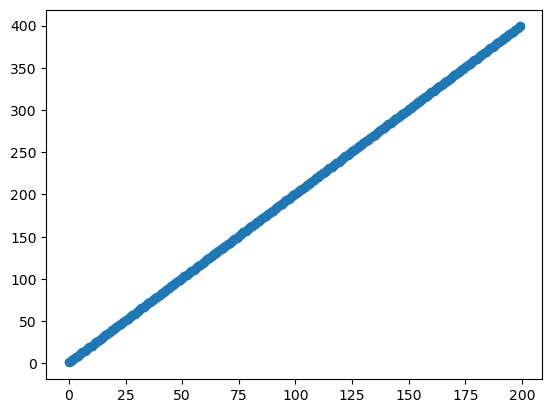

In [8]:
plt.scatter(features , target)

You can see we got a sequence of dots that resembles kind of straight line. 

Lets assume we have a line that tries to capture most of the points on this, like this

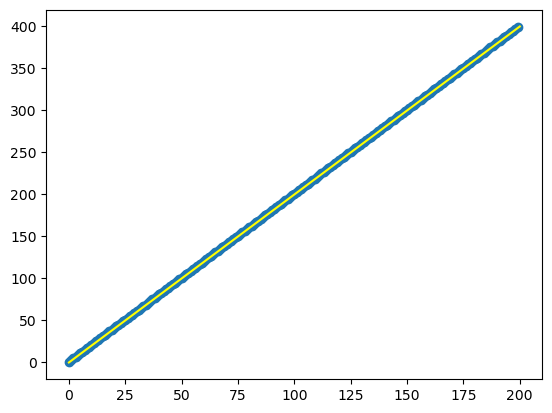

In [9]:
plt.scatter(features , target)
plt.plot([0 , 200] , [0 , 400] , "yellow")

Again by human intution we found the `best fit line`. But what if we want to generalize the things and kind of do not find the best fit line...?

First of all lets get a little bit more deep into equation $y = mx + b$

So what does these terms resembles in this eqution. 
* `m` is the slope of the line

# 2.1 | Slope of A function

Slope of a function shows how steep a function is, or the direction of a function at a given point on the curve.

Lets assume we have this curve $y = 4x^2$ the slope of this curve will be $y = 8x$

In [10]:
IFrame("https://www.desmos.com/calculator/zluqu5vyuh" , 400 , 400)

So how do we calculate the `slope` of a line???

Lets assume we have a function $y = f(x)$,. To find the slope of a function, we simply diffrenctiate the function, thus, the slope of this line will be $y^` = f^`(x)$

# 2.2 | Diffrentiation

Diffrentaition can be explained as getting a small value of a function.

lets assume we have a function `y = sin(x)`

A small strip at that function will demonstrate taking a derivative of that function `sin(x)`

Taking about the function we had taken before that is $y = 4x^2$

Taking its derivative we will get $$y = 8x$$ ($x{n^`} = nx^{n-1}$)

So the slope of $y = 4x^2$ can be represnted as 

In [11]:
IFrame("https://www.desmos.com/calculator/hrguwktg9q" , 400 , 400)

**If you want to know more aboud diffrentiation, here is [3Blue1Brown](https://www.youtube.com/@3blue1brown/featured) => [Essence Of Calculas](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr)**

So now you have a basic idea of `slope`

# 2.3 | Intercept

Now what `b` represents in the data. Usually it is called the `intercept`. Consider this graph of the equation $y = x$ or $y = 1x + b$ 

In [12]:
IFrame("https://www.desmos.com/calculator/gai0veg5fh" , 400 , 400)

This line passes the axis at $(0 , 0)$. These coordinates are called as the `intercepts` of this line. If we make `b` or `intercept` as $1$. The line will then pass from $(1 , -1)$. Basically the `intercept` moves a line in a plane. With that being said, Lets also undertand how the `slope` changes the line. If we make `m` as $2$. The line will rotate anti-clockwise. So as we increase the value of `m` or `slope`. The line moves anti-clockwise, And so the vice-versa, If we decrease the value of `m`, The slope will move in the clockwise direction. 

In short tweeking the values of `m` and `b` or `slope` and `intercept`. We can move the line in any direction and in any way we want `as long as it resembles a straight line`. We still cannot bend the line 

So now we have any data, we just need to difine the values of `slope` and `intercpet`. And we can get the best fit line. But still the question arises how do we generalize the values of these tuning parametes. 

In simple word we can say, How can we find a relation between the data we have and these tuning parameters. So that we only need to define that relationship and then we can easily predict the values.

Lets think that the value assigned to the line is this 

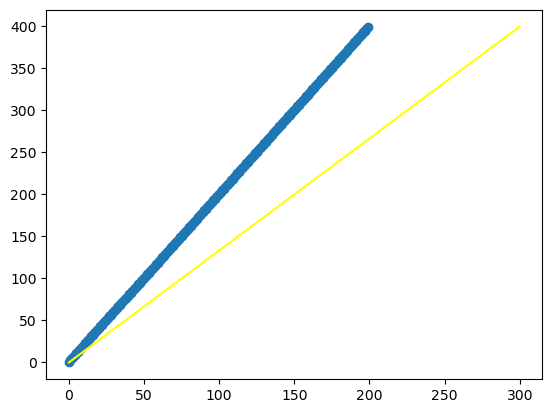

In [13]:
plt.scatter(features , target)
plt.plot([0 , 300] , [0 , 400] , "yellow")

If we test this line on the training data only, we will find that this line is not correct. It is predicting points incorrect, We know that the best fit line we drew first, will predict points wiht lowest incorrect ones. For example the line we just defined if asked the corresponding value of $200$, it will say $250$. But rather it was $400$. There was some `error`, some `loss`, or some `cost` with the `actual` and `predicted` values.

For measuring this loss, what we can do is find the difference between the `actual value` and the `predicted value`. A best fit line will give the lowest value of this difference.

The word difference here is very difficult to say, so we can give this term a new fancy name, which is `The Loss`.

One can deifne loss as $$Loss = actual - predicted$$.

We only took the example of one value. but there are a large group of values. that can show the same trait, For that we can change the formula to 

Lets denote $actual$ as $a$ and $predicted$ as $p$

$$Loss = (a_1 - p_1) + (a_2 - p_2) + (a_3 - p_3) + ... + (a_n - p_n)$$

or $$Loss = \sum\limits_{i = 1}^{n}a_i - p_i$$ or $$Loss = \sum\limits_{i = 1}^{n}(y_i - \hat y_i)$$

Whenever you see $\hat y$, think of it as the `predicted value`

Now lets assume we have data like this and a random line is drawn like this 

<img src = "https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683">

If you look closely, a lot of error terms will tend to cancel out each other. We can also get into a state where the line is `not the best fit`, but still gives $0$ error. With the `Loss` we defined before, we are not chossing a `best fit line`. Rather we are chossing a line that is in the `middle` of those points. One way to counter this is to add a `modulus` function like this $$Loss = \sum\limits_{i = 1}^{n}|y - \hat y|$$

But what is a modulus function. The function is nothing but converts, any negative numbers to postive. For example 
$|-1| = 1$

In [14]:
IFrame("https://www.desmos.com/calculator/kamxotjra2" , 400 , 400)

But there is a problem with this function. A `modulus` is not diffrentiable. You might be thinking that why are we even seeing that part, like we we care for that. Why would you even diffrentiate a loss function. 

We actually diffrentiate loss function in further steps, thats why we will not use the modulus function. 

Another way of doing so is to, square the loss function like this $Loss = (y - \hat y)^2$

Its cool, its good and we can even diffrentiate this...

Now we have a basic idea that we need to compute `m` and `b` for the lowest loss values. Now we should come to know how we can do this 

What if we somehow interelate the `losses` and `m and b`. 

There are several different methods to determine this. But lets get into more complex problem

Lets say we have target array like this 

In [15]:
target = []
for i in range(200):
    if i < 26:
        target.append(i**(1 / 2))
    else :
        target.append(i**(1/3))

In [16]:
target = np.array(target)
target

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ,
       3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739,
       3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894,
       4.47213595, 4.58257569, 4.69041576, 4.79583152, 4.89897949,
       5.        , 2.96249607, 3.        , 3.03658897, 3.07231683,
       3.10723251, 3.14138065, 3.1748021 , 3.20753433, 3.2396118 ,
       3.27106631, 3.30192725, 3.33222185, 3.36197541, 3.39121144,
       3.41995189, 3.44821724, 3.47602664, 3.50339806, 3.53034834,
       3.5568933 , 3.58304787, 3.60882608, 3.63424119, 3.65930571,
       3.6840315 , 3.70842977, 3.73251116, 3.75628575, 3.77976315,
       3.80295246, 3.82586237, 3.84850113, 3.87087664, 3.89299642,
       3.91486764, 3.93649718, 3.95789161, 3.97905721, 4.        ,
       4.02072576, 4.04124002, 4.0615481 , 4.0816551 , 4.10156593,
       4.1212853 , 4.14081775, 4.16016765, 4.1793392 , 4.19833

If we try to plot this, we get 

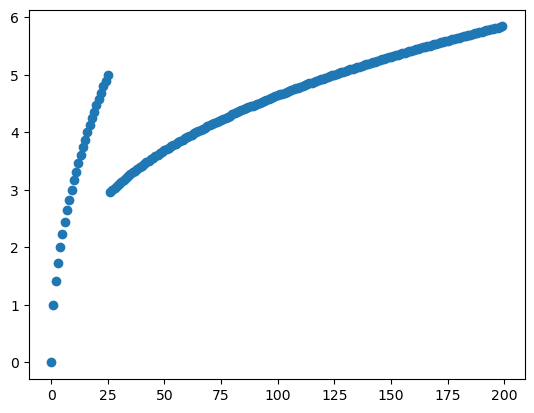

In [17]:
plt.scatter(features , target)

And also we are only given a short amount of data for training, consider to be given only the starting $30$ data only. 

So there is a high chance that the model will not be able to predict good predictions. 

To counter this, we add a hyperparameter dependent term and wieghts into the loss. So that there is still some loss for the model

So our loss will be $$Loss = (y - \hat y)^2 + \lambda(m)^2$$

But what should be the initial weights and biases. 

Lets assume we intialize the parameters randomly, like this

In [18]:
weights = np.random.randn(1)

In [19]:
weights

array([0.38361823])

In [20]:
biases = np.random.randn(1)

In [21]:
biases

array([-0.49233059])

In [22]:
pred = weights * 30 + biases

In [23]:
pred

array([11.01621618])

In [24]:
loss = (pred - 60)

In [25]:
loss

array([-48.98378382])

Our main motive is to reduce this loss as much as possible,. 

What if we subtract a small subset of the derivative of this loss from the parameters like this. The derivative of the loss will show us the steepness of the curve, and thus doing so might get us to the valeus of minimum loss. So how do we find the derivative of this function $Loss = (y - \hat y)^2$. What we know is $\hat y = mx + b$. COmputing this value in we get $$Loss = (y - mx - b)^2 + \lambda(m)^2$$, Now we can diffrentiate the function

## Diffrentiating wrt `b`
$$\frac {dLoss}{db}= \frac {d}{db}(y - mx - b)^ + \lambda(m)^2$$
$$= 2(y - mx - b)(-1)$$

## Diffrentiating wrt `m`
$$\frac {dLoss}{dm} = \frac {d}{dm}(y - mx - b)^ + \lambda(m)^2$$
$$= 2(y - mx - b)(-x) + 2\lambda m$$

In [26]:
weights -= ((-2* (60 - weights*30 - biases)) + (2 * weights)) * 0.01

In [27]:
biases -= (2 * 30 * (60 - weights * 30 - biases)) * 0.01

Lets assume $\lambda = 1$

In [28]:
print(weights)
print(biases)
loss = (60 - (weights * 30 + biases)) + (weights ** 2) 
loss

[1.35562154]
[-12.38654126]


array([33.55560489])

Our losses have been decreased, so lets do it again 

In [29]:
weights -= ((-2* loss) + (2 * weights)) * 0.01
biases -= -2 * 30 * loss * 0.01
print(weights)
print(biases)
loss = (60 - (weights * 30 + biases)) + (weights ** 2)
loss

[1.9996212]
[7.74682167]


array([-3.73697285])

So now we know if we do this iteratively, we will minimise the loss, and iteratively we will reach the optimal values of `weights` or `m` and `biases` or `m`

Lets say we have runn this again and again for around 100 times 

In [30]:
for _ in range(100):
    weights -= ((-2* loss) + (2 * weights)) * 0.01
    biases -= -2 * 30 * loss * 0.01
    loss = (60 - (weights * 30 + biases)) + (weights ** 2)

Lets now see the weights and biases 

In [31]:
weights

array([0.67830477])

In [32]:
biases

array([39.77678444])

Though we have biases as high, but we have almost achived value of `weights`

Lets do this all again, and now we will also try to plot a graph

In [33]:
weights = abs(np.random.randn(1))
biases = abs(np.random.randn(1))
losses = []
for _ in range(100):
    weights -= ((-2* loss) + (2 * weights)) * 0.01
    biases -= -2 * 30 * loss * 0.01
    loss = (60 - (weights * 30 + biases)) + (weights ** 2)
    losses.append(loss)

<AxesSubplot:>

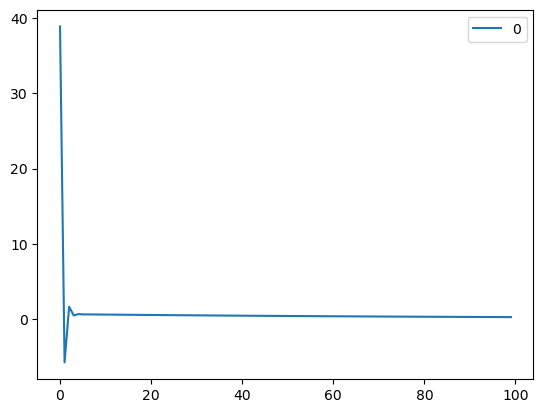

In [34]:
sns.lineplot(np.array(losses))

As we can see we have greatly decreased our losses 

Now we just need to put this all into a function 

In [35]:
def RidgeRegression():
    weights = abs(np.random.randn(1))
    biases = abs(np.random.randn(1))
    predic = []
    losses = []
    for _ in range(300):
        pred = weights * features + biases
        loss = np.sum((60 - (weights * 30 + biases)) + (weights ** 2))
        losses.append(loss)
        weights -= ((-2* loss) + (2 * weights)) * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

# 3 | Functionalities
We have made out our SGDRegressor, now we need to add some functionalities to it. We can get funcitonalites form **[Scikit-Learn](https://scikit-learn.org/)=>[Stable](https://scikit-learn.org/stable/)=>[Linear Model](https://scikit-learn.org/stable/modules/linear_model.html)=>[Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)**
* ✅List Of columns
* ✅`alpha : {float, ndarray of shape (n_targets,)}, default=1.0` - Constant that multiplies the L2 term, controlling regularization strength. `alpha` must be a non-negative float i.e. in `[0, inf)`. If an array is passed, penalties are assumed to be specific to the targets. Hence they must correspond in number.

# 3.1 | List Of Columns

This function will only work if there are only $2$ columns, one `feature` and the other one `target`. What if the user gives out a list of columns. For this we nee dto take two different arguemnts form the user and work on them differently

In [36]:
def RidgeRegression(X , y):
    
    weights = np.random.randn(X.shape[0])
    biases = np.random.randn(1)
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
        
        loss = np.sum((60 - (weights * 30 + biases)) + (weights ** 2))
        losses.append(loss)
        
        weights -= ((-2* loss) + (2 * weights)) * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

# 3.2 | Alpha 

This is the $\lambda$ term we are multiplying with the weights. We had kept it $1$ and by luck it is actually set $1$, so we just need to apply some tweeks here

In [37]:
def RidgeRegression(X , y , alpha = 0.1):
    
    weights = np.random.randn(X.shape[0])
    biases = np.random.randn(1)
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
        
        loss = np.sum((60 - (weights * 30 + biases)) + (alpha * (weights ** 2)))
        losses.append(loss)
        
        weights -= ((-2* loss) + (2 * weights)) * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

# 3.3 | Fit_Intercept
Lets assume we have a data that is centered, means there is a very low chance that its  $β$ or $intercept$ will be non-zero. So we can save some computation and time by not calculating the $β$ everytime, Yes we are greedy. This parameter decides whether the $β$ should be calculated or not

In [38]:
def RidgeRegression(X , y , 
                    alpha = 0.1 , fit_intercept = True):
    
    weights = np.zeors(shape = X.shape[0])
    biases = np.zeors(shape = 1)
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
        
        loss = np.sum((60 - (weights * 30 + biases)) + (alpha * (weights ** 2)))
        losses.append(loss)
        
        weights -= ((-2* loss) + (2 * weights)) * 0.01
        
        if fit_intercept:
            
            biases -= -2 * 30 * loss * 0.01

    return weights , biases

# 4 | Methods 
We have added major functionalities to our model, but our model still lacks major `methods` which will make our function better. We will use **[sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.Ridge.densify)** for seeing which methods to add.
* ✅`fit(X, y, coef_init=None, intercept_init=None, sample_weight=None)` - Fit linear model with Stochastic Gradient Descent.
* * ✅`X : {array-like, sparse matrix}, shape (n_samples, n_features)` - Training data.
* * ✅`y : ndarray of shape (n_samples,)` - Target values.
* * ✅`sample_weight : array-like, shape (n_samples,), default=None` - Weights applied to individual samples (1. for unweighted).
* ✅`get_params(deep=True)` - Get parameters for this estimator.
* * ✅`deep : bool, default=True` - If True, will return the parameters for this estimator and contained subobjects that are estimators.
* ✅`predict(X)` - Predict using the linear model.
* * ✅`X : {array-like, sparse matrix}, shape (n_samples, n_features)` - Input data.
*✅`score(X, y, sample_weight=None)` - Return the coefficient of determination of the prediction. The coefficient of determination
$R^2$ is defined as $(1 - \frac{u}{v})$, where $u$ is the residual sum of squares `((y_true - y_pred)** 2).sum()` and $v$ is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`. The best possible score is $1.0$ and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of `y`, disregarding the input features, would get a $R^2$ score of $0.0$.
* * ✅`X : array-like of shape (n_samples, n_features)` - Test samples. For some estimators this may be a precomputed kernel matrix or a list of generic objects instead with shape `(n_samples, n_samples_fitted)`, where `n_samples_fitted` is the number of samples used in the fitting for the estimator.
* * ✅`y : array-like of shape (n_samples,) or (n_samples, n_outputs)` - True values for `X`.
* * ✅`sample_weight : array-like of shape (n_samples,), default=None` - Sample weights.

# 4.1 | Fit
For this first of all we need to get into `class` and define specified functions. All of the major working of the function will be now kept in a different function `fit`, this function takes $3$ arguments  , `X` , `y` , `sample_weight`. There is a nested `if` condition if the `len(sample_weight)` is not correct. It will throw a warining and move on with $0$ weights and biases 

In [39]:
class RidgeRegression:
    
    def __init__(self , X , y , 
                    alpha = 0.1 , fit_intercept = True):pass
    
    def fit(self , X , y , sample_weight): 
        
        if sample_weight != None:
            
            if len(sampe_weight) != (X.shape[0] + 1):
            
                warnings.warn("Please use the correct shape of `sample_weights`. using `0` as the parameters!!")
            
            else : 
                
                weights , biases = sample_weight[:1] , sample_weight[0]
        
        else : 
        
            weights = np.zeors(shape = X.shape[0])
            biases = np.zeors(1)
    
        predic = []
        losses = []

        for _ in range(300):

            pred = weights * features + biases

            loss = np.sum((60 - (weights * 30 + biases)) + (alpha * (weights ** 2)))
            losses.append(loss)

            weights -= ((-2* loss) + (2 * weights)) * 0.01

            if fit_intercept:

                biases -= -2 * 30 * loss * 0.01

        return weights , biases

# 4.2 | Get_Params 
This method is used to get the parameters of the function, `if deep == True` we return all the weights and biases, `else` the latest ones. For this first of all we need to make two empty lists `weights_list` , `biases_list` with shape $(X.shape[0], max_iter)$, which will be iterated and added with elements. Secendoly we need to make another function `get_params` , which returns the value if called 

In [40]:
class RidgeRegression:
    
    def __init__(self , X , y , 
                    alpha = 0.1 , fit_intercept = True):pass
    
    def fit(self, X , y , sample_weight): 
        
        if sample_weight != None:
            
            if len(sampe_weight) != (X.shape[0] + 1):
            
                warnings.warn("Please use the correct shape of `sample_weights`. using `0` as the parameters!!")
            
            else : 
                
                weights , biases = sample_weight[:1] , sample_weight[0]
        
        else : 
        
            weights = np.zeors(shape = X.shape[0])
            biases = np.zeors(1)
    
        predic = []
        losses = []

        for _ in range(300):

            pred = weights * features + biases

            loss = np.sum((60 - (weights * 30 + biases)) + (alpha * (weights ** 2)))
            losses.append(loss)

            weights -= ((-2* loss) + (2 * weights)) * 0.01

            if fit_intercept:

                biases -= -2 * 30 * loss * 0.01

        return weights , biases
    
    def get_params(self , deep = True): 
        
        if deep:
            
            return weights_list , biases_list
        
        else :
        
            return weights , biases
        

# 4.3 | Predict
Now we need to apply the major formula $y = mx + b$ further developing this formula for more than $1$ column we can get $y = \beta_0 + \beta_1x_1 + \beta_2x_2 +...+ \beta_nx_n$ or $y = \beta_0 + \sum\limits_{i = 1}^{n}\beta_ix_i$. For this we just need to make a function `predict` and make the computations 

In [41]:
class RidgeRegression:
    
    def __init__(self , X , y , 
                    alpha = 0.1 , fit_intercept = True):pass
    
    def fit(self, X , y , sample_weight): 
        
        if sample_weight != None:
            
            if len(sampe_weight) != (X.shape[0] + 1):
            
                warnings.warn("Please use the correct shape of `sample_weights`. using `0` as the parameters!!")
            
            else : 
                
                weights , biases = sample_weight[:1] , sample_weight[0]
        
        else : 
        
            weights = np.zeors(shape = X.shape[0])
            biases = np.zeors(1)
    
        predic = []
        losses = []

        for _ in range(300):

            pred = weights * features + biases

            loss = np.sum((60 - (weights * 30 + biases)) + (alpha * (weights ** 2)))
            losses.append(loss)

            weights -= ((-2* loss) + (2 * weights)) * 0.01

            if fit_intercept:

                biases -= -2 * 30 * loss * 0.01

        return weights , biases
    
    def get_params(self , deep = True): 
        
        if deep:
            
            return weights_list , biases_list
        
        else :
        
            return weights , biases
    
    def predict(self , x_test):
        
        predictions = [np.sum(weghts * x + biases) for x in X_test]
        predictions = np.array(predictions)
        
        return predictions

# 4.4 | Score 
The score defines how good our model is. We will be using $R^2$ for this and the formula is $$(1 - \frac {\sum\limits_{i = 1}^{n}(y - \hat y)^2}{\sum\limits_{i = 1}^{n}(y - y_{mean})^2})$$ or $$(1 - \sum\limits_{i = 1}^{n}\frac {(y - \hat y)^2}{(y - y_{mean})^2})$$

In [42]:
class RidgeRegression:
    
    def __init__(self , X , y , 
                    alpha = 0.1 , fit_intercept = True):pass
    
    def fit(self, X , y , sample_weight): 
        
        if sample_weight != None:
            
            if len(sampe_weight) != (X.shape[0] + 1):
            
                warnings.warn("Please use the correct shape of `sample_weights`. using `0` as the parameters!!")
            
            else : 
                
                weights , biases = sample_weight[:1] , sample_weight[0]
        
        else : 
        
            weights = np.zeors(shape = X.shape[0])
            biases = np.zeors(1)
    
        predic = []
        losses = []

        for _ in range(300):

            pred = weights * features + biases

            loss = np.sum((60 - (weights * 30 + biases)) + (alpha * (weights ** 2)))
            losses.append(loss)

            weights -= ((-2* loss) + (2 * weights)) * 0.01

            if fit_intercept:

                biases -= -2 * 30 * loss * 0.01

        return weights , biases
    
    def get_params(self , deep = True): 
        
        if deep:
            
            return weights_list , biases_list
        
        else :
        
            return weights , biases
    
    def predict(self , x_test):
        
        predictions = [np.sum(weghts * x + biases) for x in X_test]
        predictions = np.array(predictions)
        
        return predictions
    
    def score(X_test , Y_test , sample_weight = None):
        
        if sample_weight != None:
    
            if len(sampe_weight) != (X.shape[0] + 1):
            
                warnings.warn("Please use the correct shape of `sample_weights`. using `0` as the parameters!!")

                weights = np.zeors(shape = X.shape[0])
                biases = np.zeors(1)
            
            else : 
                
                weights , biases = sample_weight[:1] , sample_weight[0]

        else : 

            weights = np.zeors(shape = X.shape[0])
            biases = np.zeors(1)
        
        params = np.vstack([biases , weights])
        
        score = 1 - ((np.sum(np.sqaure(Y_test - self.predict(X_test , sample_weight = params)))) / (np.sum(np.sqaure(Y_test - Y_test.mean()))))

        return score
        

# 5 | Rdige Regression Final Source Code 

In [43]:
class RidgeRegression:
    
    def __init__(self , X , y , 
                    alpha = 0.1 , fit_intercept = True):pass
    
    def fit(self, X , y , sample_weight): 
        
        if sample_weight != None:
            
            if len(sampe_weight) != (X.shape[0] + 1):
            
                warnings.warn("Please use the correct shape of `sample_weights`. using `0` as the parameters!!")
            
            else : 
                
                weights , biases = sample_weight[:1] , sample_weight[0]
        
        else : 
        
            weights = np.zeors(shape = X.shape[0])
            biases = np.zeors(1)
    
        predic = []
        losses = []

        for _ in range(300):

            pred = weights * features + biases

            loss = np.sum((60 - (weights * 30 + biases)) + (alpha * (weights ** 2)))
            losses.append(loss)

            weights -= ((-2* loss) + (2 * weights)) * 0.01

            if fit_intercept:

                biases -= -2 * 30 * loss * 0.01

        return weights , biases
    
    def get_params(self , deep = True): 
        
        if deep:
            
            return weights_list , biases_list
        
        else :
        
            return weights , biases
    
    def predict(self , x_test):
        
        predictions = [np.sum(weghts * x + biases) for x in X_test]
        predictions = np.array(predictions)
        
        return predictions
    
    def score(X_test , Y_test , sample_weight = None):
        
        if sample_weight != None:
    
            if len(sampe_weight) != (X.shape[0] + 1):
            
                warnings.warn("Please use the correct shape of `sample_weights`. using `0` as the parameters!!")

                weights = np.zeors(shape = X.shape[0])
                biases = np.zeors(1)
            
            else : 
                
                weights , biases = sample_weight[:1] , sample_weight[0]

        else : 

            weights = np.zeors(shape = X.shape[0])
            biases = np.zeors(1)
        
        params = np.vstack([biases , weights])
        
        score = 1 - ((np.sum(np.sqaure(Y_test - self.predict(X_test , sample_weight = params)))) / (np.sum(np.sqaure(Y_test - Y_test.mean()))))

        return score
        

**THIS IS NOT THE FULL IMPLEMENTATION, IT STILL LACKS MANY FUNCTIONALITIES AND IS VULENRABLE TO MANY EDGE CASES, WE WILL IMPROVE THIS IN THE UPCOMING VERSIONS**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**

**THATS IT FOR TODAY GUYS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE :)**

**PEACE OUT !!!**